In [2]:
from sogaPreprocessor import *
from producecfg import *
from libSOGA import *

In [3]:
compiledFile=compile2SOGA('../programs/SOGA/SSA/Poisson.soga')

In [4]:
cfg = produce_cfg(compiledFile)

ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1


In [5]:
output_dist = start_SOGA(cfg)

ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1


/Users/rominadoz/Desktop/Home/SOGA4SSA/src/libSOGAupdate.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  pois_it[k_val] = 1 - norm.cdf(-muprime/pois_sigma)
/Users/rominadoz/Desktop/Home/SOGA4SSA/src/libSOGAupdate.py:35: RuntimeWarning: divide by zero encountered in scalar divide
  pois_it[k_val] = muprime*pois_it[k_val-1] + pois_sigma*norm.pdf(-muprime/pois_sigma)


# Squares of Gaussian

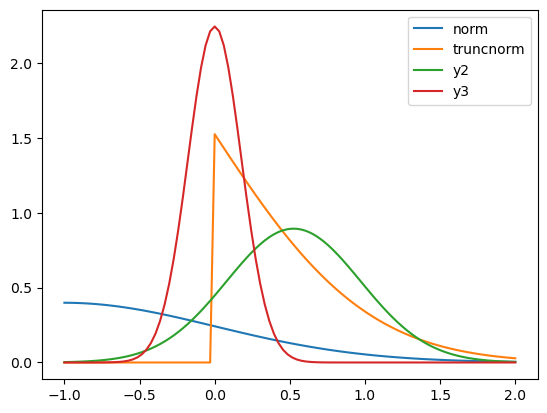

In [6]:
#pois = np.random.poisson(0.025, 50000)

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1,2,100)
y_norm = norm.pdf(x, -1, 1)

from scipy.stats import truncnorm
a = 0
b = +np.inf
mu= -1
sigma = 1
alpha = (a - mu)/sigma
beta = (b - mu)/sigma

y_truncnorm = truncnorm.pdf(x, alpha, beta, mu, sigma)

mu_trunc, var_trunc = truncnorm.stats(alpha, beta, mu, sigma)

y2 = norm.pdf(x, mu_trunc, np.sqrt(var_trunc))
y3 = norm.pdf(x, 0, np.sqrt((1-norm.cdf(0,mu,sigma))*var_trunc))


#plt.hist(pois, density=True)
plt.plot(x, y_norm, label='norm')
plt.plot(x, y_truncnorm, label='truncnorm')
plt.plot(x, y2, label='y2')
plt.plot(x, y3, label='y3')
plt.legend()


In [7]:
var_trunc

0.19909766557034903

mean samples: 1.9692
var samples: 0.13173136


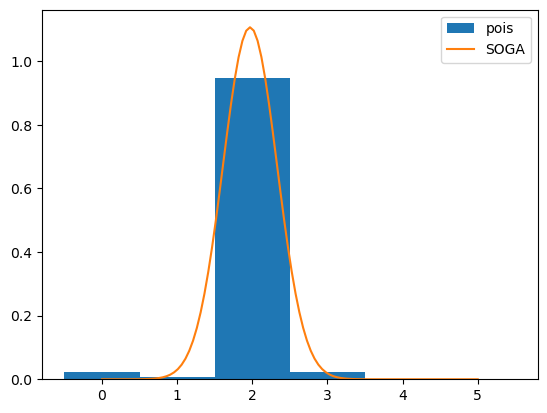

In [8]:
pois1 = np.random.poisson(0.025, 50000)
pois2 = np.random.poisson(0.025, 50000)
pois3 = np.random.poisson(0.005, 50000)
x1 = 2 + pois1 - 2*pois2 - pois3

from scipy.stats import norm

x = np.linspace(0,5,100)
y_soga = norm.pdf(x, 1.97, 0.360555)

#plt.hist(gauss_samples, bins=150, density=True, label='gauss')
plt.hist(x1, bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5], density=True, label='pois')
plt.plot(x, y_soga, label='SOGA')
#plt.plot(x, y_soga_biased, label='SOGA biased')
plt.legend()

print('mean samples:', np.mean(x1))
print('var samples:', np.var(x1))


In [9]:
np.sqrt(0.005)

0.07071067811865475

ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
mean samples: 4.01562
var samples: 1.0584960156000003
mean SOGA: 4.010899908025
var SOGA: 2.051866524389907
mean SOGA biased: 4.010899908025
var SOGA biased: 1.0259332621949535


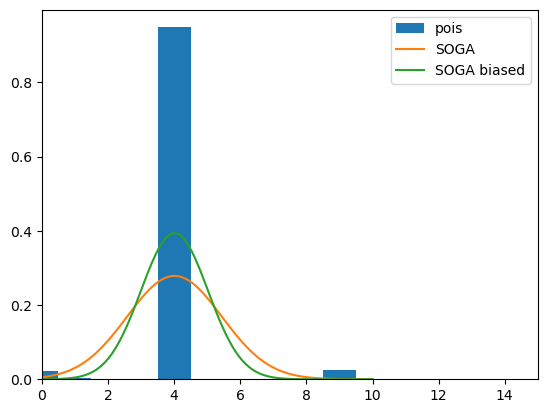

In [10]:
compiledFile=compile2SOGA('../programs/SOGA/SSA/Square.soga')
cfg = produce_cfg(compiledFile)
output_dist = start_SOGA(cfg)

x = np.linspace(0,10,100)
y_soga = output_dist.gm.marg_pdf(x, 1)


soga_mean = output_dist.gm.mean()[1]
soga_var = output_dist.gm.cov()[1,1]

gauss_samples = np.random.normal(1.97, 0.360555, 100000)
gauss_samples = gauss_samples**2

pois1 = np.random.poisson(0.025, 50000)
pois2 = np.random.poisson(0.025, 50000)
pois3 = np.random.poisson(0.005, 50000)
x1 = 2 + pois1 - 2*pois2 - pois3
pois_samples = x1**2

from scipy.stats import norm

y_soga_biased = norm.pdf(x, soga_mean, np.sqrt(0.5*soga_var))

#plt.hist(gauss_samples, bins=150, density=True, label='gauss')
plt.hist(pois_samples, bins=[-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5], density=True, label='pois')
plt.plot(x, y_soga, label='SOGA')
plt.plot(x, y_soga_biased, label='SOGA biased')
plt.xlim(0,15)
plt.legend()

print('mean samples:', np.mean(pois_samples))
print('var samples:', np.var(pois_samples))

print('mean SOGA:', soga_mean)
print('var SOGA:', soga_var)

print('mean SOGA biased:', soga_mean)
print('var SOGA biased:', 0.5*soga_var)

In [11]:
import numpy as np

mu1 = 0.025
mu2 = 0.025
mu3 = 0.005
quad1 = mu1 + mu1**2
quad2 = mu2 + mu2**2
quad3 = mu3 + mu3**2
skew1 = mu1**3 + 3*mu1**2 + mu1
skew2 = mu2**3 + 3*mu2**2 + mu2
skew3 = mu3**3 + 3*mu3**2 + mu3
kurt1 = mu1**4 + 6*mu1**3 + 7*mu1**2 + mu1
kurt2 = mu2**4 + 6*mu2**3 + 7*mu2**2 + mu2
kurt3 = mu3**4 + 6*mu3**3 + 7*mu3**2 + mu3

pois1 = np.random.poisson(mu1, 5000000)
pois2 = np.random.poisson(mu2, 5000000)
pois3 = np.random.poisson(mu3, 5000000)
x1 = pois1 + pois2 + pois3

np.mean(x1**2)

0.0579904

In [12]:
quad1 + quad2 + quad3 + 2*(mu1*mu2 + mu2*mu3 + mu1*mu3)

0.05802500000000001

In [13]:
np.mean(x1**3)

0.0642044

In [14]:
skew1 + skew2 + skew3 + 3*(quad1*mu2 + quad1*mu3 + quad2*mu1 + quad2*mu3 + quad3*mu1 + quad3*mu2) + 6*mu1*mu2*mu3

0.064241375

In [15]:
np.mean(x1**4)

0.0771712

In [16]:
kurt1 + kurt2 + kurt3 + 4*(skew1*mu2 + skew1*mu3 +skew2*mu1 + skew2*mu3 + skew3*mu1 + skew3*mu2) + 6*(quad1*quad2 + quad1*quad3 + quad2*quad3) + 12*(quad1*mu2*mu3 + mu1*quad2*mu3 + mu1*mu2*quad3)

0.077182400625

In [17]:
from sogaPreprocessor import *
from producecfg import *
from libSOGA import *

compiledFile=compile2SOGA('../programs/SOGA/SSA/CL.soga')
cfg = produce_cfg(compiledFile)
output_dist = start_SOGA(cfg)

output_dist.gm.mean()

ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1


array([0.025     , 0.025     , 0.005     , 4.26089851])

In [18]:
pois1 = np.random.poisson(mu1, 10000000)
pois2 = np.random.poisson(mu2, 10000000)
pois3 = np.random.poisson(mu3, 10000000)
x1 = np.random.normal(2, 0.5, 10000000) + pois1 - 2*pois2 - pois3
np.var(x1**2)

5.202732568907273

In [19]:
print(np.var(x1**2) - 6.18774257)

c1, c2, c3 = 1, -2, -1
mu1, mu2, mu3 = 0.025, 0.025, 0.005

tot = c1**4*(4*mu1**2+mu1) + c2**4*(4*mu2**2+mu2) + c3**4*(4*mu3**2+mu3) + 4*(c1**3*c2*mu1*mu2 + c1**3*c3*mu1*mu3 + c2**3*c1*mu2*mu1 + c2**3*c3*mu2*mu3 + c3**3*c1*mu3*mu1 + c3**3*c2*mu3*mu2)
tot

-0.9850100010927267


0.45160000000000006

In [20]:
tot + 4*(c1**3*2*mu1 + c2**3*2*mu2 + c3**3*2*mu3)

-0.9884000000000002

# Central moments of Poisson

In [21]:
rate = 0.02
samples = np.random.poisson(rate, 5000000)
np.mean(samples**3)

0.0212202

In [22]:
rate**3+3*rate**2+rate

0.021208

In [23]:
np.mean(samples**4)

0.0229334

In [24]:
rate**4+6*rate**3+7*rate**2+rate

0.02284816

In [25]:
(2+3+4)**4

6561

In [26]:
2**4+3**4+4**4 + 4*(8*3+8*4+27*2+27*4+64*2+64*3) + 6*(4*9+4*16+9*16) + 12*(4*3*4 + 2*9*4 + 2*3*16)

6561

In [27]:
x = 'state[10]'
int(x[x.index('[')+1:x.index(']')])

10

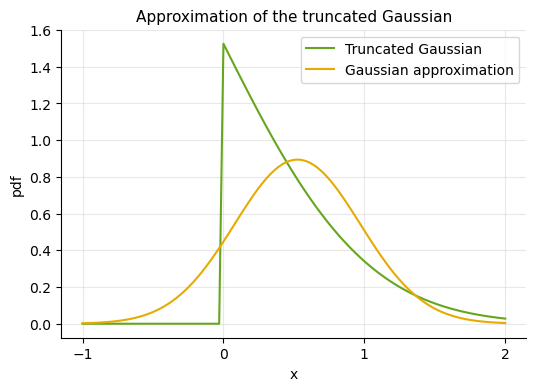

In [28]:
import matplotlib as mpl
pois = np.random.poisson(0.025, 50000)
colors = mpl.colormaps['Dark2'].colors

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

x = np.linspace(-1,2,100)
y_norm = norm.pdf(x, -1, 1)

from scipy.stats import truncnorm
a = 0
b = +np.inf
mu= -1
sigma = 1
alpha = (a - mu)/sigma
beta = (b - mu)/sigma

y_truncnorm = truncnorm.pdf(x, alpha, beta, mu, sigma)

mu_trunc, var_trunc = truncnorm.stats(alpha, beta, mu, sigma)

y2 = norm.pdf(x, mu_trunc, np.sqrt(var_trunc))
y3 = norm.pdf(x, 0, np.sqrt((1-norm.cdf(0,mu,sigma))*var_trunc))
poisson = scipy.stats.poisson(0.025)

plt.rcParams['figure.figsize'] = [6,4]
#plt.plot(x, poisson.pmf(x), label='poisson')
#plt.hist(pois, density=True, bins=2, label='Poisson', color=colors[7], alpha=0.4)
#plt.plot(x, y_norm, label='norm')
plt.plot(x, y_truncnorm, label='Truncated Gaussian', color=colors[4])
plt.plot(x, y2, label='Gaussian approximation', color=colors[5])
#plt.plot(x, y3, label='y3')
plt.ylabel('pdf', fontsize=10)
plt.xlabel('x', fontsize=10)
plt.title('Approximation of the truncated Gaussian', fontsize=11)
plt.legend(fontsize = 10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(color='lightgray', alpha=0.5, zorder=1)
plt.xticks([-1,0,1,2])

plt.savefig('poisson.png', dpi=300)

In [73]:
compiledFile=compile2SOGA('../programs/SOGA/SSA/Poisson.soga')
cfg = produce_cfg(compiledFile)
output_dist = start_SOGA(cfg)
output_dist

ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1


/Users/rominadoz/Desktop/Home/SOGA4SSA/src/libSOGAupdate.py:33: RuntimeWarning: divide by zero encountered in scalar divide
  pois_it[k_val] = 1 - norm.cdf(-muprime/pois_sigma)
/Users/rominadoz/Desktop/Home/SOGA4SSA/src/libSOGAupdate.py:35: RuntimeWarning: divide by zero encountered in scalar divide
  pois_it[k_val] = muprime*pois_it[k_val-1] + pois_sigma*norm.pdf(-muprime/pois_sigma)


Dist<['rate', 'k2'],pi: [1.0] mu: [array([0.4      , 0.6805012])] sigma: [array([[0.        , 0.        ],
       [0.        , 0.20911859]])]>

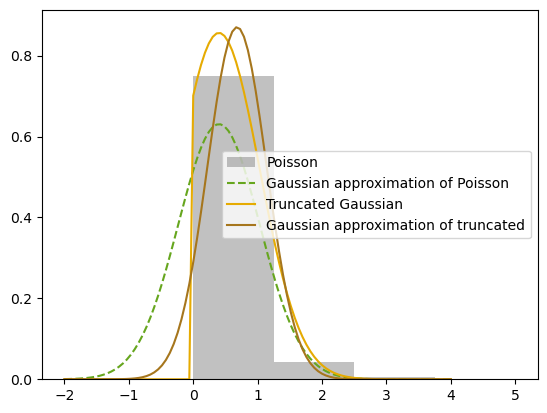

In [74]:
k = 0.4
poisson = np.random.poisson(k, 50000)
gaussian = scipy.stats.norm(k, np.sqrt(k))
truncated = scipy.stats.truncnorm((0-k)/np.sqrt(k), np.inf, k, np.sqrt(k))
gaussian_approximation = scipy.stats.norm(0.68, np.sqrt(0.21))

x = np.linspace(-2,4,100)
#plt.rcParams['figure.figsize'] = [6,4]
plt.rcdefaults()
plt.hist(poisson, density=True, bins=4, label='Poisson', color=colors[7], alpha=0.4)
plt.plot(x, gaussian.pdf(x) , '--', color=colors[4], label = 'Gaussian approximation of Poisson')
plt.plot(x, truncated.pdf(x), color=colors[5], label = 'Truncated Gaussian')
plt.plot(x, gaussian_approximation.pdf(x), color=colors[6], label = 'Gaussian approximation of truncated')
plt.legend()